In [1]:
#importation des bibliothèques
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
#affichage de dataset
df = pd.read_csv(r"C:\Users\Youcode\Desktop\brief_github\brief_1\data\data_3\github_dataset_clean_updated.csv")
df

Unnamed: 0                                                url   
0              0                    https://github.com/jmoiron/sqlx  \
1              1                https://github.com/vlucas/phpdotenv   
2              2                 https://github.com/davatorium/rofi   
3              3              https://github.com/doctrine/inflector   
4              4              https://github.com/jedisct1/libsodium   
...          ...                                                ...   
9799        9799         https://github.com/gorilla-llm/gorilla-cli   
9800        9800  https://github.com/MatthewJamesBoyle/golang-in...   
9801        9801                  https://github.com/terhechte/Ebou   
9802        9802                   https://github.com/nv-tlabs/NKSR   
9803        9803         https://github.com/autodistill/autodistill   

                                    full_name   
0                                jmoiron/sqlx  \
1                            vlucas/phpdotenv   
2                             davatorium/rofi   
3                          doctrine/inflector   
4                          jedisct1/libsodium   
...                                       ...   
9799                  gorilla-llm/gorilla-cli   
9800  MatthewJamesBoyle/golang-interview-prep   
9801                           terhechte/Ebou   
9802                            nv-tlabs/NKSR   
9803                  autodistill/autodistill   

                                            description  stars  forks  issues   
0     general purpose extensions to golang's databas...  13878   1027     326  \
1     Loads environment variables from `.env` to `ge...  12586    623       4   
2     Rofi: A window switcher, application launcher ...  11292    601      55   
3     Doctrine Inflector is a small library that can...  11076    123      15   
4       A modern, portable, easy to use crypto library.  11042   1694       2   
...                                                 ...    ...    ...     ...   
9799                                  LLMs for your CLI    393      7       6   
9800                                                 Go    391     62       0   
9801   A cross platform Mastodon Client written in Rust    388     30       3   
9802  [CVPR 2023 Highlight] Neural Kernel Surface Re...    386     13       6   
9803  Images to inference with no labeling (use foun...    386     29       7   

      watchers language   last_push date_created   
0          196       Go  2023-06-06   2013-01-28  \
1          172      PHP  2023-06-27   2013-01-23   
2           92        C  2023-07-05   2013-01-20   
3           23      PHP  2023-06-27   2013-01-10   
4          393        C  2023-06-19   2013-01-20   
...        ...      ...         ...          ...   
9799         5   Python  2023-07-01   2023-06-20   
9800         5       Go  2023-06-14   2023-06-11   
9801         4     Rust  2023-07-04   2023-06-16   
9802        18   Python  2023-06-24   2023-06-08   
9803         7   Python  2023-07-03   2023-06-06   

                                                 topics   
0                                           [no topics]  \
1     ['configuration', 'dotenv', 'environment', 'en...   
2     ['application-launcher', 'c', 'dmenu', 'dmenu-...   
3                                           [no topics]   
4                       ['c', 'crypto', 'cryptography']   
...                                                 ...   
9799  ['aws', 'azure', 'bash', 'cli', 'gcp', 'k8s', ...   
9800                                        [no topics]   
9801  ['app', 'desktop-app', 'dioxus', 'linux', 'mac...   
9802  ['3d-reconstruction', 'computer-vision', 'grap...   
9803  ['auto-labeling', 'computer-vision', 'deep-lea...   

                                 description_translated   
0     general purpose extensions to golangs databasesql  \
1     loads environment variables from env to getenv...   
2     rofi a window switcher application launcher an...   
3     doctrine inflec

In [3]:
#affichage du fichier technique
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   url                     9804 non-null   object
 1   full_name               9804 non-null   object
 2   description             9804 non-null   object
 3   stars                   9804 non-null   int64 
 4   forks                   9804 non-null   int64 
 5   issues                  9804 non-null   int64 
 6   watchers                9804 non-null   int64 
 7   language                9804 non-null   object
 8   last_push               9804 non-null   object
 9   date_created            9804 non-null   object
 10  topics                  9804 non-null   object
 11  description_translated  9803 non-null   object
 12  languages               9804 non-null   object
dtypes: int64(4), object(9)
memory usage: 995.8+ KB


**Erreurs de formatage**

In [4]:
#convertir les dates en type date
df['date_created'] = pd.to_datetime(df['date_created'])
df['last_push'] = pd.to_datetime(df['last_push'])
print(df.dtypes)

url                               object
full_name                         object
description                       object
stars                              int64
forks                              int64
issues                             int64
watchers                           int64
language                          object
last_push                 datetime64[ns]
date_created              datetime64[ns]
topics                            object
description_translated            object
languages                         object
dtype: object


**valeurs manquantes**

In [5]:
df.isna().sum()

url                       0
full_name                 0
description               0
stars                     0
forks                     0
issues                    0
watchers                  0
language                  0
last_push                 0
date_created              0
topics                    0
description_translated    1
languages                 0
dtype: int64

In [6]:
df.loc[df['description_translated'].isna()]

url     full_name description  stars  forks   
2610  https://github.com/sorrycc/blog  sorrycc/blog           💡   4500    338  \

      issues  watchers language  last_push date_created       topics   
2610      43       433  article 2019-03-21   2016-02-29  [no topics]  \

     description_translated languages  
2610                    NaN        []

In [8]:
df['description_translated'].fillna(df['language'], inplace=True)

In [9]:
df.loc[df['full_name'] == 'sorrycc/blog']

url     full_name description  stars  forks   
2610  https://github.com/sorrycc/blog  sorrycc/blog           💡   4500    338  \

      issues  watchers language  last_push date_created       topics   
2610      43       433  article 2019-03-21   2016-02-29  [no topics]  \

     description_translated languages  
2610                article        []

In [10]:
df.loc[df['languages'] == '[]'] 

url   
43       https://github.com/bbatsov/clojure-style-guide  \
47                   https://github.com/samsquire/ideas   
61    https://github.com/JoshuaKGoldberg/Old-Deleted...   
76                https://github.com/qinjx/30min_guides   
89      https://github.com/christiannaths/redacted-font   
...                                                 ...   
9673         https://github.com/CLUEbenchmark/SuperCLUE   
9692  https://github.com/HqWu-HITCS/Awesome-Chinese-LLM   
9728           https://github.com/PKU-YuanGroup/ChatLaw   
9745                  https://github.com/majinqiawa/xxn   
9746               https://github.com/dtinth/superwhite   

                                        full_name   
43                    bbatsov/clojure-style-guide  \
47                                samsquire/ideas   
61    JoshuaKGoldberg/Old-Deleted-FullScreenMario   
76                             qinjx/30min_guides   
89                   christiannaths/redacted-font   
...                                           ...   
9673                      CLUEbenchmark/SuperCLUE   
9692               HqWu-HITCS/Awesome-Chinese-LLM   
9728                        PKU-YuanGroup/ChatLaw   
9745                               majinqiawa/xxn   
9746                            dtinth/superwhite   

                                            description  stars  forks  issues   
43    A community coding style guide for the Clojure...   3961    280      42  \
47    a hundred ideas for computing - a record of id...   3733    227      11   
61    An HTML5 remake of the original Super Mario Br...   2993    885       0   
76                                 覃健祥的学习笔记，各种几十分钟入门的文档   7027   1680       9   
89    Keep your wireframes free of distracting Lorem...   5338    218      10   
...                                                 ...    ...    ...     ...   
9673  SuperCLUE: 中文通用大模型综合性基准 | A Benchmark for Foun...   1405     48      19   
9692  整理开源的中文大语言模型，以规模较小、可私有化部署、训练成本较低的模型为主，包括底座模型，垂...   1001    106       1   
9728                                            中文法律大模型   2978    240      21   
9745               非正常人类研究中心 存储中国大陆各类非正常女性所为的非正常案件，欢迎补充   1097    117       6   
9746  display a very bright white color on HDR-enabl...   1083     19       4   

      watchers language  last_push date_created   
43         145  article 2023-04-15   2013-01-03  \
47         255  article 2022-07-03   2013-01-19   
61         199  article 2016-08-17   2013-01-25   
76         357  article 2020-02-09   2013-02-27   
89         138  article 2021-11-04   2013-02-07   
...        ...      ...        ...          ...   
9673        21  article 2023-06-19   2023-05-02   
9692        26  article 2023-07-06   2023-05-22   
9728        20  article 2023-07-06   2023-06-07   
9745        15  article 2023-07-04   2023-06-13   
9746         5  article 2023-06-21   2023-06-17   

                                                 topics   
43             ['clojure', 'style-guide', 'styleguide']  \
47              ['ideas', 'ideasworthsharing', 'notes']   
61                                          [no topics]   
76                                          [no topics]   
89                                          [no topics]   
...                                                 ...   
9673  ['chatgpt', 'chinese', 'evaluation', 'foundati...   
9692  ['awesome-lists', 'chatglm', 'chinese', 'llama...   
9728                                        [no topics]   
9745                                        [no topics]   
9746                                        [no topics]   

                                 description_translated languages  
43    a community coding style guide for the clojure...        []  
47    a hundred ideas for computing  a record of ide...        []  
61    an html5 remake of the original super mario br...        []  
76    qin jianxiangs study notes various documents f...        []  
89    keep your wireframes free of distracting lorem...        []  
...

In [11]:
df['languages'].replace('[]', '[article]', inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   url                     9804 non-null   object        
 1   full_name               9804 non-null   object        
 2   description             9804 non-null   object        
 3   stars                   9804 non-null   int64         
 4   forks                   9804 non-null   int64         
 5   issues                  9804 non-null   int64         
 6   watchers                9804 non-null   int64         
 7   language                9804 non-null   object        
 8   last_push               9804 non-null   datetime64[ns]
 9   date_created            9804 non-null   datetime64[ns]
 10  topics                  9804 non-null   object        
 11  description_translated  9804 non-null   object        
 12  languages               9804 non-null   object  

**Analyse univariée**

In [13]:
numeric_columns = ['stars', 'forks', 'issues', 'watchers']

In [14]:
df[numeric_columns].describe()

stars        forks       issues     watchers
count   9804.000000  9804.000000  9804.000000  9804.000000
mean    5035.697980   684.866279    66.857813   123.767034
std     3019.019324   600.485002    76.986579   107.220026
min      386.000000     0.000000     0.000000     2.000000
25%     2971.500000   245.000000    11.000000    42.000000
50%     4312.500000   498.000000    36.000000    90.000000
75%     6370.250000   936.000000    95.000000   173.000000
max    16291.000000  3061.000000   344.000000   529.000000

In [15]:
# Select the top 20 languages
top_20_languages = df['language'].value_counts().head(20)

In [16]:
# Create a DataFrame for the top 20 languages
top_20_df = pd.DataFrame({'Language': top_20_languages.index, 'Count': top_20_languages.values})

# Create the pie chart using Plotly Express
fig = px.pie(top_20_df, values='Count', names='Language', title='Top 20 Languages')

# Show the plot
fig.show()

In [17]:
# Iterate over the numerical columns
for column in numeric_columns:
    # Create a histogram for each numerical column
    fig = px.histogram(df, x=column, title=f"Histogram of {column}")
    fig.show()

**Analyse multivariée**

In [18]:
# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()
corr_matrix

stars     forks    issues  watchers
stars     1.000000  0.520806  0.236501  0.535567
forks     0.520806  1.000000  0.179387  0.645322
issues    0.236501  0.179387  1.000000  0.100242
watchers  0.535567  0.645322  0.100242  1.000000

In [20]:
# Create the heatmap using Plotly Express
fig = px.imshow(corr_matrix)
# Show the plot
fig.show()

In [24]:
# Create the scatter plot matrix using Plotly Express
fig = px.scatter_matrix(df, dimensions=numeric_columns, color='language')
fig.show()

**Analyse de données**

In [34]:
# Get the top 10 used languages
top_languages = df['language'].value_counts().nlargest(10).index.tolist()

# Filter the data to only include the top 10 used languages
df_top_languages = df[df['language'].isin(top_languages)]

# Group by language and date_created, and count the number of repositories
df_grouped = df_top_languages.groupby(['language', pd.Grouper(key='date_created', freq='M')]).size().reset_index(name='count')

# Create the line chart
fig = px.line(df_grouped, x='date_created', y='count', color='language', title='Distribution of Top 10 Used Languages over Time')
fig.show()

In [35]:
# Group by language and date_created, and sum the number of issues
df_grouped = df_top_languages.groupby(['language', pd.Grouper(key='date_created', freq='M')])['issues'].sum().reset_index(name='count')

# Create the line chart
fig = px.line(df_grouped, x='date_created', y='count', color='language', title='Evolution of Top 10 Languages with Number of Issues over Time')
fig.show()

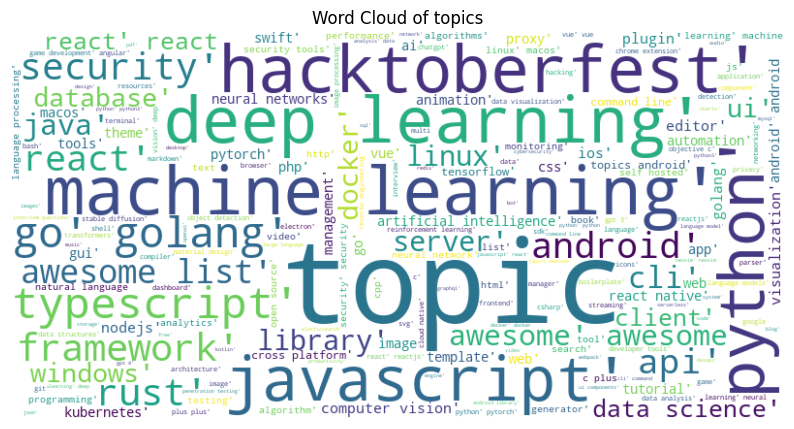

In [55]:
# Concatenate all descriptions into a single string
text = ' '.join(df['topics'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of topics')
plt.show()

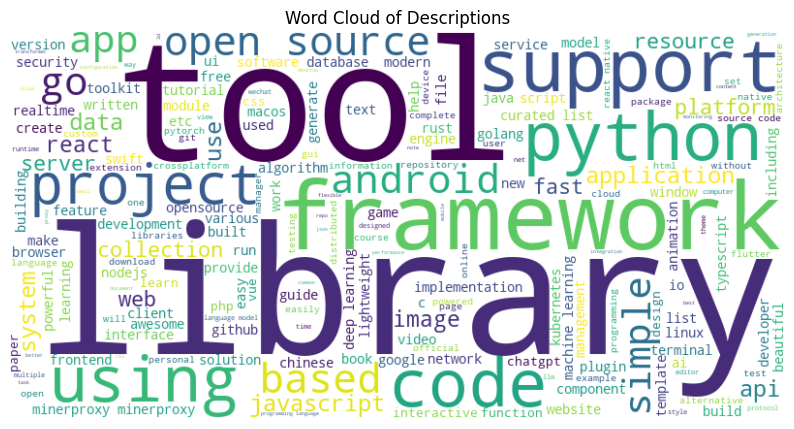

In [56]:
# Concatenate all descriptions into a single string
text = ' '.join(df['description_translated'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

**Etude entre 2013 et 2017**

In [27]:
# Filter the dataframe based on date_created range
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2017-12-31')

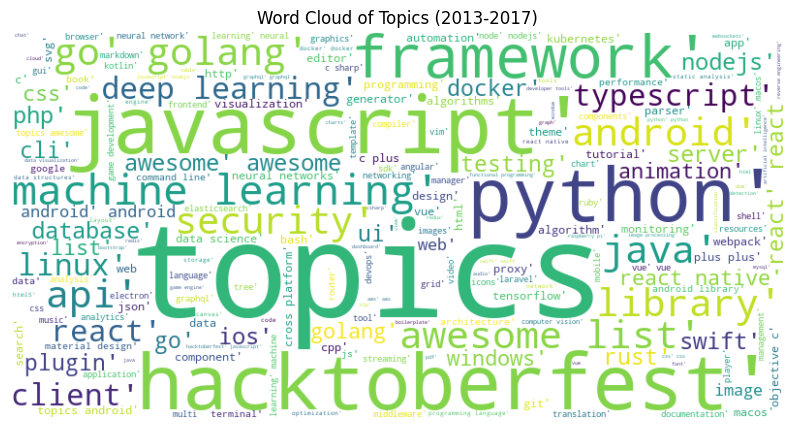

In [28]:
df_filtered = df[(df['date_created'] >= start_date) & (df['date_created'] <= end_date)]

# Concatenate all descriptions into a single string
descriptions = ' '.join(df_filtered['topics'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics (2013-2017)')
plt.show()

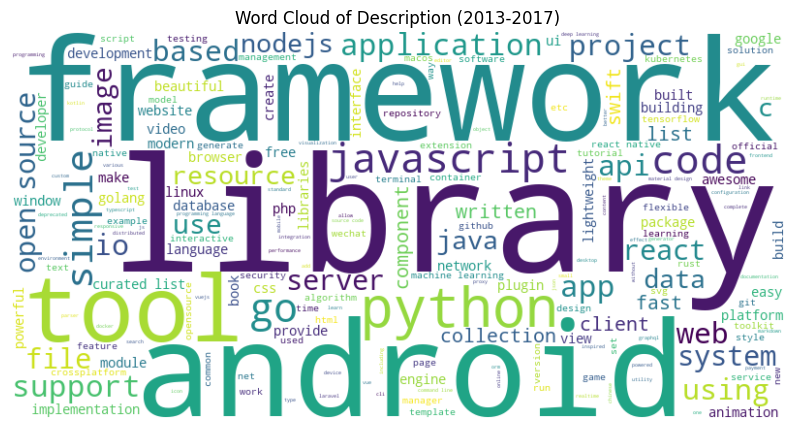

In [31]:
# Concatenate all descriptions into a single string
descriptions = ' '.join(df_filtered['description_translated'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description (2013-2017)')
plt.show()

In [32]:
# Get the top 20 repositories with the most stars
top_repos = df_filtered.nlargest(20, 'stars')

# Group by language and sum the number of stars
df_grouped = top_repos.groupby('language')['stars'].sum().reset_index(name='count')

# Create the pie chart
fig = px.pie(df_grouped, values='count', names='language', title='Distribution of Languages in Top 20 Repositories (2013-2017) with Most Stars')
fig.show()

In [33]:
# Group by language and sum the number of stars, forks, and watchers
df_grouped = df_filtered.groupby('language').agg({'stars': 'sum', 'forks': 'sum', 'watchers': 'sum'}).reset_index()

# Get the top 20 languages by the total number of stars
top_languages = df_grouped.nlargest(20, 'stars')['language'].tolist()

# Filter the data to only include the top 20 languages
df_filtered_top = df_filtered[df_filtered['language'].isin(top_languages)]

# Group by language and sum the number of stars, forks, and watchers
df_grouped_stars = df_filtered_top.groupby('language')['stars'].sum().reset_index(name='count')
df_grouped_forks = df_filtered_top.groupby('language')['forks'].sum().reset_index(name='count')
df_grouped_watchers = df_filtered_top.groupby('language')['watchers'].sum().reset_index(name='count')

# Create the pie charts
fig_stars = px.pie(df_grouped_stars, values='count', names='language', title='Popularity of Top 20 Languages by Stars (2013-2017)')
fig_forks = px.pie(df_grouped_forks, values='count', names='language', title='Popularity of Top 20 Languages by Forks (2013-2017)')
fig_watchers = px.pie(df_grouped_watchers, values='count', names='language', title='Popularity of Top 20 Languages by Watchers (2013-2017)')

# Show the pie charts
fig_stars.show()
fig_forks.show()
fig_watchers.show()

**Etude entre 2018 et 2023**

In [40]:
# Filter the dataframe based on date_created range
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-06-30')

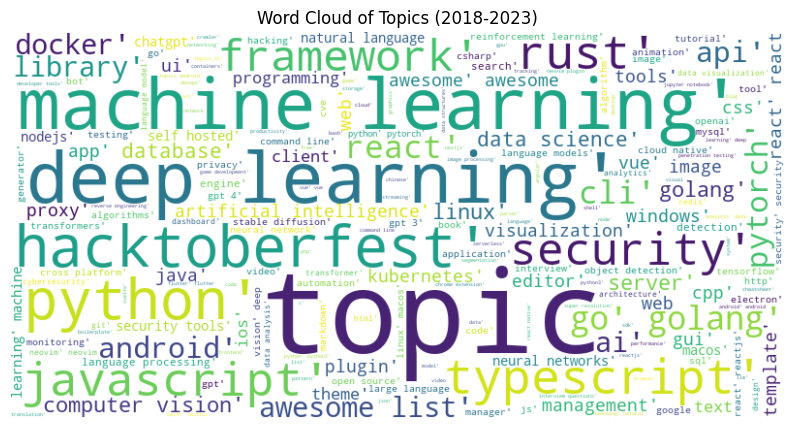

In [42]:
df_filtered = df[(df['date_created'] >= start_date) & (df['date_created'] <= end_date)]

# Concatenate all descriptions into a single string
descriptions = ' '.join(df_filtered['topics'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics (2018-2023)')
plt.show()

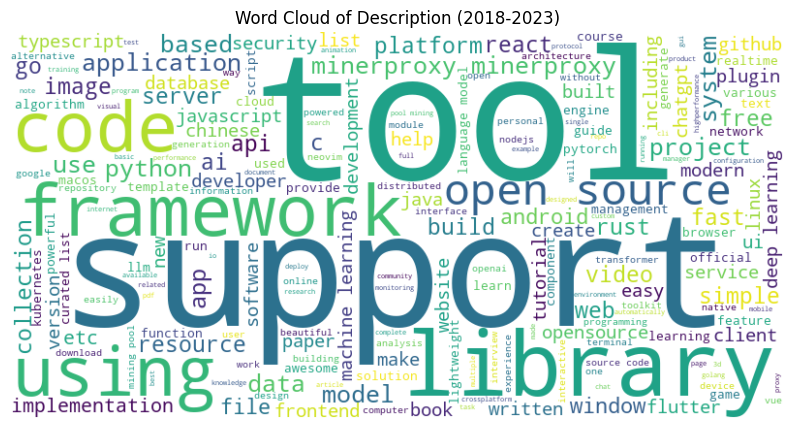

In [43]:
# Concatenate all descriptions into a single string
descriptions = ' '.join(df_filtered['description_translated'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Description (2018-2023)')
plt.show()

In [44]:
# Get the top 20 repositories with the most stars
top_repos = df_filtered.nlargest(20, 'stars')

# Group by language and sum the number of stars
df_grouped = top_repos.groupby('language')['stars'].sum().reset_index(name='count')

# Create the pie chart
fig = px.pie(df_grouped, values='count', names='language', title='Distribution of Languages in Top 20 Repositories (2018-2023) with Most Stars')
fig.show()

In [45]:
# Group by language and sum the number of stars, forks, and watchers
df_grouped = df_filtered.groupby('language').agg({'stars': 'sum', 'forks': 'sum', 'watchers': 'sum'}).reset_index()

# Get the top 20 languages by the total number of stars
top_languages = df_grouped.nlargest(20, 'stars')['language'].tolist()

# Filter the data to only include the top 20 languages
df_filtered_top = df_filtered[df_filtered['language'].isin(top_languages)]

# Group by language and sum the number of stars, forks, and watchers
df_grouped_stars = df_filtered_top.groupby('language')['stars'].sum().reset_index(name='count')
df_grouped_forks = df_filtered_top.groupby('language')['forks'].sum().reset_index(name='count')
df_grouped_watchers = df_filtered_top.groupby('language')['watchers'].sum().reset_index(name='count')

# Create the pie charts
fig_stars = px.pie(df_grouped_stars, values='count', names='language', title='Popularity of Top 20 Languages by Stars (2018-2023)')
fig_forks = px.pie(df_grouped_forks, values='count', names='language', title='Popularity of Top 20 Languages by Forks (2018-2023)')
fig_watchers = px.pie(df_grouped_watchers, values='count', names='language', title='Popularity of Top 20 Languages by Watchers (2018-2023)')

# Show the pie charts
fig_stars.show()
fig_forks.show()
fig_watchers.show()

**Contributeurs**

In [46]:
df_contributors = pd.read_csv(r"C:\Users\Youcode\Desktop\brief_github\brief_1\data\data_3\github_dataset_contributors.csv")
df_contributors.drop('Unnamed: 0', axis=1, inplace=True)
df_contributors

full_name    contributor  contributions
0                  jmoiron/sqlx        jmoiron            315
1                  jmoiron/sqlx     nussjustin             12
2                  jmoiron/sqlx      cmillward              5
3                  jmoiron/sqlx    QuangTung97              5
4                  jmoiron/sqlx       wyattjoh              4
...                         ...            ...            ...
444076  autodistill/autodistill      capjamesg             47
444077  autodistill/autodistill       yeldarby             13
444078  autodistill/autodistill         hariag              2
444079  autodistill/autodistill  artyaltanzaya              1
444080  autodistill/autodistill       SkalskiP              1

[444081 rows x 3 columns]

In [47]:
df_contributors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444081 entries, 0 to 444080
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   full_name      444081 non-null  object
 1   contributor    444081 non-null  object
 2   contributions  444081 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.2+ MB


In [57]:
# Group the data by contributor and repository and sum the contributions
contributions = df_contributors.groupby(['contributor', 'full_name'])['contributions'].sum().reset_index()

# Get the top 20 contributors by contributions
top_contributors = contributions.groupby('contributor')['contributions'].sum().nlargest(20).reset_index()

# Get the top 20 repositories by contributions
top_repositories = contributions.groupby('full_name')['contributions'].sum().nlargest(20).reset_index()

# Filter the contributions DataFrame to include only the top 20 contributors and repositories
contributions = contributions[(contributions['contributor'].isin(top_contributors['contributor'])) & (contributions['full_name'].isin(top_repositories['full_name']))]

# Create the horizontal stacked bar chart using Plotly Express
fig = px.bar(contributions, x='contributions', y='contributor', color='full_name', orientation='h', title='Top 20 Contributors and Repositories by Contributions')
fig.show()

In [58]:
# Get the top 20 contributors by contributions
top_contributors = contributions.groupby('contributor')['contributions'].sum().nlargest(20).reset_index()

# Filter the contributions DataFrame to include only the top 20 contributors and repositories
contributions_top20 = contributions[contributions['contributor'].isin(top_contributors['contributor'])]

# Join the contributions_top20 DataFrame with the df DataFrame to include additional repository information
contributions_top20 = pd.merge(contributions_top20, df, on='full_name')

# Group the contributions_top20 DataFrame by contributor and create a list of full_name repositories
contributions_by_contributor = contributions_top20.groupby('contributor')['full_name'].agg(list).reset_index()

# Print the list of full_name repositories and additional information for each of the top 20 contributors
for index, row in contributions_by_contributor.iterrows():
    print(f"{row['contributor']}:")
    for repo_name in row['full_name']:
        repo_info = contributions_top20[contributions_top20['full_name'] == repo_name].iloc[0]
        print(f"  - {repo_name}: {repo_info['description']}, {repo_info['language']}")

Awkee:
  - learnhard-cn/free_proxy_ss: 分享免费梯子/科学上网/代理/shadowsocks(SS)/ShadowsocksR(SSR)/V2ray(vmess)代理，2小时更新一次，分享Clash代理订阅源和配置文件订阅链接。, article
MikhailKasimov:
  - stamparm/maltrail: Malicious traffic detection system, Python
advisory-database[bot]:
  - github/advisory-database: Security vulnerability database inclusive of CVEs and GitHub originated security advisories from the world of open source software., article
bitnami-bot:
  - bitnami/containers: Bitnami container images, Shell
bors:
  - crablang/crab: A community fork of a language named after a plant fungus. All of the memory-safe features you love, now with 100% less bureaucracy! , Rust
dependabot[bot]:
  - crablang/crab: A community fork of a language named after a plant fungus. All of the memory-safe features you love, now with 100% less bureaucracy! , Rust
  - facebook/sapling: A Scalable, User-Friendly Source Control System., Rust
  - facebookincubator/cinder: Cinder is Meta's internal performance-oriented production versi

In [59]:
# Merge the two DataFrames based on the common column "full_name"
merged_df = df_contributors.merge(df[['full_name', 'language']], on='full_name')

# Get the top 20 contributors by contributions
top_contributors = merged_df.groupby('contributor')['contributions'].sum().nlargest(20).reset_index()

# Filter the merged DataFrame to include only the top 20 contributors
merged_top20 = merged_df[merged_df['contributor'].isin(top_contributors['contributor'])]

# Group the merged_top20 DataFrame by contributor and language, and calculate the count of repositories for each language
contributors_languages = merged_top20.groupby(['contributor', 'language']).size().reset_index(name='count')

# Create the bar plot
fig = px.bar(contributors_languages, x='contributor', y='count', color='language',
             title='Top 20 Contributors and Their Repositories by Language',
             labels={'contributor': 'Contributor', 'count': 'Number of Repositories'})

# Rotate x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()
